# Interactive Plots of COVID-19 Data
This is a notebook to interact with COVID-19 data using [Jupyter](https://jupyter.org/) and [Hvplot](https://hvplot.holoviz.org/). Currently we are focused on data from the US but may expand our analyses in the near future.

## Load Johns Hopkins COVID-19 Data
Here we load the COVID-19 confirmed case data from the [The Center for Systems Science and Engineering (CSSE)](https://systems.jhu.edu) at Johns Hopkins University. The CCSE COVID-19 [GitHub Repo](https://github.com/CSSEGISandData/COVID-19) has more information about these data and their sources.

In [81]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
import hvplot.pandas
import datetime


In [82]:
metric='Confirmed'
# metric='Deaths'
# metric='Recovered'


In [83]:
dr='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

In [84]:
tday=datetime.date.today()
tday

datetime.date(2020, 11, 30)

In [85]:
tday=datetime.date.today()
day=datetime.timedelta(days=2)
yday=tday-day*1
fname=yday.strftime('%m-%d-%Y.csv')

In [86]:
src = dr + fname
src

'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-28-2020.csv'

In [87]:
df1 = pd.read_csv(src)
df1

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-29 05:25:55,33.939110,67.709953,45966,1752,36709,7505.0,Afghanistan,118.078497,3.811513
1,NaN,NaN,NaN,Albania,2020-11-29 05:25:55,41.153300,20.168300,36790,787,18152,17851.0,Albania,1278.407117,2.139168
2,NaN,NaN,NaN,Algeria,2020-11-29 05:25:55,28.033900,1.659600,81212,2393,52568,26251.0,Algeria,185.199700,2.946609
3,NaN,NaN,NaN,Andorra,2020-11-29 05:25:55,42.506300,1.521800,6610,76,5710,824.0,Andorra,8554.973144,1.149773
4,NaN,NaN,NaN,Angola,2020-11-29 05:25:55,-11.202700,17.873900,15087,345,7763,6979.0,Angola,45.904208,2.286737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,NaN,NaN,NaN,West Bank and Gaza,2020-11-29 05:25:55,31.952200,35.233200,81890,704,62944,18242.0,West Bank and Gaza,1605.240584,0.859690
3972,NaN,NaN,NaN,Western Sahara,2020-11-29 05:25:55,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3973,NaN,NaN,NaN,Yemen,2020-11-29 05:25:55,15.552727,48.516388,2160,615,1498,47.0,Yemen,7.242011,28.472222
3974,NaN,NaN,NaN,Zambia,2020-11-29 05:25:55,-13.133897,27.849332,17589,357,16925,307.0,Zambia,95.675816,2.029678


In [88]:
dfus=df1[['Combined_Key','Admin2','Province_State','Country_Region','Last_Update', 'Lat', 'Long_', metric]]
dfus=dfus[dfus.Country_Region=='US']
dfus=dfus[dfus.Admin2!='Unassigned']
dfus.reset_index(drop=True, inplace=True)
dfus.set_index('Combined_Key', inplace=True)
dfus

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed
Combined_Key,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922
...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037


In [89]:
#dOld=dfus['Last_Update'][0]
dOld=pd.to_datetime(dfus['Last_Update'][0]).date()
dOld

datetime.date(2020, 11, 29)

In [90]:
dfus1=dfus.rename(columns={metric:dOld})

In [91]:
#dfus1=dfus.copy()
dfus1

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29
Combined_Key,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922
...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037


In [92]:
i=2
dday=tday-day*i
fname2=dday.strftime('%m-%d-%Y.csv')

In [93]:
df2=pd.read_csv(dr+fname2)

In [94]:
fname2

'11-26-2020.csv'

In [95]:
dfus=df2[['Combined_Key','Admin2','Province_State','Country_Region','Last_Update', 'Lat', 'Long_',metric]]
dfus=dfus[dfus.Country_Region=='US']
dfus=dfus[dfus.Admin2!='Unassigned']
dfus.reset_index(drop=True, inplace=True)
dfus.set_index('Combined_Key', inplace=True)
dfus

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed
Combined_Key,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-27 05:26:53,32.539527,-86.644082,2704
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-27 05:26:53,30.727750,-87.722071,8576
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-27 05:26:53,31.868263,-85.387129,1170
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-27 05:26:53,32.996421,-87.125115,1170
"Blount, Alabama, US",Blount,Alabama,US,2020-11-27 05:26:53,33.982109,-86.567906,2879
...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-27 05:26:53,41.659439,-108.882788,1598
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-27 05:26:53,43.935225,-110.589080,1476
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-27 05:26:53,41.287818,-110.547578,1016


In [96]:
dNew=pd.to_datetime(dfus['Last_Update'][0]).date()
dNew

datetime.date(2020, 11, 27)

In [97]:
dfus2=dfus.rename(columns={
                     'Admin2':'aNew', 
                     'Province_State': 'psNew',
                     'Country_Region': 'crNew', 
                     'Last_Update': 'luNew',
                     'Lat': 'latNew',
                     'Long_': 'lonNew'})

In [98]:
#dfus2=dfus.copy()
dfus2

,aNew,psNew,crNew,luNew,latNew,lonNew,Confirmed
Combined_Key,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-27 05:26:53,32.539527,-86.644082,2704
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-27 05:26:53,30.727750,-87.722071,8576
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-27 05:26:53,31.868263,-85.387129,1170
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-27 05:26:53,32.996421,-87.125115,1170
"Blount, Alabama, US",Blount,Alabama,US,2020-11-27 05:26:53,33.982109,-86.567906,2879
...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-27 05:26:53,41.659439,-108.882788,1598
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-27 05:26:53,43.935225,-110.589080,1476
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-27 05:26:53,41.287818,-110.547578,1016


In [99]:
dfusc=pd.concat([dfus1,dfus2], axis=1, join='outer')
dfusc

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29,aNew,psNew,crNew,luNew,latNew,lonNew,Confirmed
Combined_Key,,,,,,,,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735,Autauga,Alabama,US,2020-11-27 05:26:53,32.539527,-86.644082,2704
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733,Baldwin,Alabama,US,2020-11-27 05:26:53,30.727750,-87.722071,8576
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173,Barbour,Alabama,US,2020-11-27 05:26:53,31.868263,-85.387129,1170
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179,Bibb,Alabama,US,2020-11-27 05:26:53,32.996421,-87.125115,1170
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922,Blount,Alabama,US,2020-11-27 05:26:53,33.982109,-86.567906,2879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780,Sweetwater,Wyoming,US,2020-11-27 05:26:53,41.659439,-108.882788,1598
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570,Teton,Wyoming,US,2020-11-27 05:26:53,43.935225,-110.589080,1476
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037,Uinta,Wyoming,US,2020-11-27 05:26:53,41.287818,-110.547578,1016


In [100]:
#df1.set_index('Combined_Key', inplace=True)
#df2.set_index('Combined_Key', inplace=True)
#dfc=pd.merge(df1, df2, on=['Combined_Key','Combined_Key'])
#dfc

## Now clean the table

In [101]:
dfusc.rename(columns={metric:dNew}, inplace=True)

In [102]:
dfusc

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29,aNew,psNew,crNew,luNew,latNew,lonNew,2020-11-27
Combined_Key,,,,,,,,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735,Autauga,Alabama,US,2020-11-27 05:26:53,32.539527,-86.644082,2704
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733,Baldwin,Alabama,US,2020-11-27 05:26:53,30.727750,-87.722071,8576
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173,Barbour,Alabama,US,2020-11-27 05:26:53,31.868263,-85.387129,1170
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179,Bibb,Alabama,US,2020-11-27 05:26:53,32.996421,-87.125115,1170
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922,Blount,Alabama,US,2020-11-27 05:26:53,33.982109,-86.567906,2879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780,Sweetwater,Wyoming,US,2020-11-27 05:26:53,41.659439,-108.882788,1598
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570,Teton,Wyoming,US,2020-11-27 05:26:53,43.935225,-110.589080,1476
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037,Uinta,Wyoming,US,2020-11-27 05:26:53,41.287818,-110.547578,1016


In [103]:
dfusc.drop(columns={'aNew','psNew', 'crNew', 'luNew', 'lonNew', 'latNew'}, inplace=True)

In [104]:
dfusc

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29,2020-11-27
Combined_Key,,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735,2704
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733,8576
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173,1170
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179,1170
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922,2879
...,...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780,1598
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570,1476
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037,1016


## Make a function

In [105]:
dfus1

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29
Combined_Key,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922
...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037


In [106]:
def appendData(dfAll,i,tday):
        print(i)
        #print(id(dfAll))
        #print(dfAll.columns)
        day=datetime.timedelta(days=1)
        dday=yday-day*i
        fname2=dday.strftime('%m-%d-%Y.csv')
        df2=pd.read_csv(dr+fname2)
        dfus=df2[['Combined_Key','Admin2','Province_State','Country_Region','Last_Update', 'Lat', 'Long_', metric]]
        dfus=dfus[dfus.Country_Region=='US']
        dfus.reset_index(drop=True, inplace=True)
        dfus.set_index('Combined_Key', inplace=True)
        dNew=pd.to_datetime(dfus['Last_Update'][0]).date()
        print(dNew)
        dfus2=dfus.rename(columns={
                             'Admin2':'aNew', 
                             'Province_State': 'psNew',
                             'Country_Region': 'crNew', 
                             'Last_Update': 'luNew',
                             'Lat': 'latNew',
                             'Long_': 'lonNew'})
        #dfus2=dfus.copy()
        dfusc=pd.concat([dfAll,dfus2], axis=1, join='outer')
        dfusc2=dfusc.rename(columns={metric:dNew})
        dfusc3=dfusc2.drop(columns={'aNew','psNew', 'crNew', 'luNew', 'lonNew', 'latNew'})
        dfusc3.iloc[:,-1]=pd.to_numeric(dfusc3.iloc[:,-1], errors='ignore', downcast='float')
        return dfusc3

In [107]:
#dfTest=appendData(dfus1,1,tday)
#dfTest

## Run the function

In [108]:
dfus1

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29
Combined_Key,,,,,,,
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922
...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,US,2020-11-29 05:25:55,41.659439,-108.882788,1780
"Teton, Wyoming, US",Teton,Wyoming,US,2020-11-29 05:25:55,43.935225,-110.589080,1570
"Uinta, Wyoming, US",Uinta,Wyoming,US,2020-11-29 05:25:55,41.287818,-110.547578,1037


In [109]:
#ndays=pd.to_datetime(dOld).date()-pd.to_datetime(dNew).date()
deltaDay=datetime.date.today()-datetime.date(2020,3,23)
ndays=int(deltaDay/day)
ndays


126

In [110]:
days=range(1, ndays, 1)
tday=datetime.date.today()

In [111]:
dfAll=dfus1.copy()
for i in days:
    dfAll=appendData(dfAll,i,tday)
    #print('outside')
    #print(dfAll.columns)

1
2020-11-28
2
2020-11-27
3
2020-11-26
4
2020-11-25
5
2020-11-24
6
2020-11-23
7
2020-11-22
8
2020-11-21
9
2020-11-20
10
2020-11-19
11
2020-11-18
12
2020-11-17
13
2020-11-16
14
2020-11-15
15
2020-11-14
16
2020-11-13
17
2020-11-12
18
2020-11-11
19
2020-11-10
20
2020-11-09
21
2020-11-08
22
2020-11-07
23
2020-11-06
24
2020-11-05
25
2020-11-04
26
2020-11-03
27
2020-11-02
28
2020-11-01
29
2020-10-31
30
2020-10-30
31
2020-10-29
32
2020-10-28
33
2020-10-27
34
2020-10-26
35
2020-10-25
36
2020-10-24
37
2020-10-23
38
2020-10-22
39
2020-10-21
40
2020-10-20
41
2020-10-19
42
2020-10-18
43
2020-10-17
44
2020-10-16
45
2020-10-15
46
2020-10-14
47
2020-10-13
48
2020-10-12
49
2020-10-11
50
2020-10-10
51
2020-10-09
52
2020-10-08
53
2020-10-07
54
2020-10-06
55
2020-10-05
56
2020-10-04
57
2020-10-03
58
2020-10-02
59
2020-10-01
60
2020-09-30
61
2020-09-29
62
2020-09-28
63
2020-09-27
64
2020-09-26
65
2020-09-25
66
2020-09-24
67
2020-09-23
68
2020-09-22
69
2020-09-21
70
2020-09-20
71
2020-09-19
72
2020-09-18
7

In [112]:
dfAll

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-11-29,2020-11-28,2020-11-27,2020-11-26,...,2020-08-05,2020-08-04,2020-08-03,2020-08-02,2020-08-01,2020-07-31,2020-07-30,2020-07-29,2020-07-28,2020-07-27
"Autauga, Alabama, US",Autauga,Alabama,US,2020-11-29 05:25:55,32.539527,-86.644082,2735.0,2716.0,2704.0,2686.0,...,1086.0,1086.0,1078.0,1064.0,1042.0,1029.0,1006.0,995.0,988.0,971.0
"Baldwin, Alabama, US",Baldwin,Alabama,US,2020-11-29 05:25:55,30.727750,-87.722071,8733.0,8603.0,8576.0,8473.0,...,3347.0,3298.0,3241.0,3194.0,3116.0,3075.0,3001.0,2873.0,2800.0,2733.0
"Barbour, Alabama, US",Barbour,Alabama,US,2020-11-29 05:25:55,31.868263,-85.387129,1173.0,1171.0,1170.0,1170.0,...,616.0,615.0,613.0,611.0,603.0,598.0,586.0,585.0,576.0,570.0
"Bibb, Alabama, US",Bibb,Alabama,US,2020-11-29 05:25:55,32.996421,-87.125115,1179.0,1173.0,1170.0,1162.0,...,393.0,390.0,383.0,373.0,369.0,364.0,353.0,345.0,339.0,335.0
"Blount, Alabama, US",Blount,Alabama,US,2020-11-29 05:25:55,33.982109,-86.567906,2922.0,2888.0,2879.0,2855.0,...,845.0,841.0,838.0,820.0,799.0,773.0,738.0,701.0,679.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Unassigned, West Virginia, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Unassigned, Wisconsin, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Unassigned, Wyoming, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"New York City, New York, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,226280.0,225964.0,225723.0,225460.0,225148.0,224863.0,224551.0,224249.0,224051.0,223761.0


In [113]:
dfUS=dfAll[dfAll.Country_Region=='US']

In [114]:
dfUS.Admin2.fillna('Total', inplace=True)
#dfm['id'] = dfm[['Admin2', 'Province_State']].agg('-'.join, axis=1)
dfUS['Country_Region'] = dfUS['Admin2'] + ', ' + dfAll['Province_State']

C:\Users\zdefne\AppData\Local\Continuum\anaconda3\envs\zarr\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-114-0f684dbcd7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUS['Country_Region'] = dfUS['Admin2'] + ', ' + dfAll['Province_State']


In [115]:
dfUS.rename(columns = {'Lat':'lat', 'Long_':'lon','Country_Region':'id'}, inplace = True)

C:\Users\zdefne\AppData\Local\Continuum\anaconda3\envs\zarr\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [116]:
dfUS


,Admin2,Province_State,id,Last_Update,lat,lon,2020-11-29,2020-11-28,2020-11-27,2020-11-26,...,2020-08-05,2020-08-04,2020-08-03,2020-08-02,2020-08-01,2020-07-31,2020-07-30,2020-07-29,2020-07-28,2020-07-27
"Autauga, Alabama, US",Autauga,Alabama,"Autauga, Alabama",2020-11-29 05:25:55,32.539527,-86.644082,2735.0,2716.0,2704.0,2686.0,...,1086.0,1086.0,1078.0,1064.0,1042.0,1029.0,1006.0,995.0,988.0,971.0
"Baldwin, Alabama, US",Baldwin,Alabama,"Baldwin, Alabama",2020-11-29 05:25:55,30.727750,-87.722071,8733.0,8603.0,8576.0,8473.0,...,3347.0,3298.0,3241.0,3194.0,3116.0,3075.0,3001.0,2873.0,2800.0,2733.0
"Barbour, Alabama, US",Barbour,Alabama,"Barbour, Alabama",2020-11-29 05:25:55,31.868263,-85.387129,1173.0,1171.0,1170.0,1170.0,...,616.0,615.0,613.0,611.0,603.0,598.0,586.0,585.0,576.0,570.0
"Bibb, Alabama, US",Bibb,Alabama,"Bibb, Alabama",2020-11-29 05:25:55,32.996421,-87.125115,1179.0,1173.0,1170.0,1162.0,...,393.0,390.0,383.0,373.0,369.0,364.0,353.0,345.0,339.0,335.0
"Blount, Alabama, US",Blount,Alabama,"Blount, Alabama",2020-11-29 05:25:55,33.982109,-86.567906,2922.0,2888.0,2879.0,2855.0,...,845.0,841.0,838.0,820.0,799.0,773.0,738.0,701.0,679.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater, Wyoming, US",Sweetwater,Wyoming,"Sweetwater, Wyoming",2020-11-29 05:25:55,41.659439,-108.882788,1780.0,1774.0,1598.0,1598.0,...,251.0,250.0,247.0,242.0,240.0,237.0,234.0,228.0,221.0,215.0
"Teton, Wyoming, US",Teton,Wyoming,"Teton, Wyoming",2020-11-29 05:25:55,43.935225,-110.589080,1570.0,1547.0,1476.0,1476.0,...,362.0,358.0,354.0,348.0,335.0,331.0,318.0,311.0,292.0,279.0
"Uinta, Wyoming, US",Uinta,Wyoming,"Uinta, Wyoming",2020-11-29 05:25:55,41.287818,-110.547578,1037.0,1037.0,1016.0,1016.0,...,267.0,265.0,262.0,259.0,254.0,247.0,245.0,243.0,235.0,233.0
"Washakie, Wyoming, US",Washakie,Wyoming,"Washakie, Wyoming",2020-11-29 05:25:55,43.904516,-107.680187,417.0,415.0,395.0,395.0,...,54.0,49.0,49.0,49.0,48.0,46.0,45.0,45.0,45.0,45.0


In [117]:
dfUS.drop(columns={'Admin2','Province_State','Last_Update'}, inplace=True)

C:\Users\zdefne\AppData\Local\Continuum\anaconda3\envs\zarr\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [118]:
#dfUS[(dfUS.ck=='Suffolk, Massachusetts, US')]
#dfUS.loc['Suffolk, Massachusetts, US']
dfUS[dfUS.id.str.contains('unassgined')]


,id,lat,lon,2020-11-29,2020-11-28,2020-11-27,2020-11-26,2020-11-25,2020-11-24,2020-11-23,...,2020-08-05,2020-08-04,2020-08-03,2020-08-02,2020-08-01,2020-07-31,2020-07-30,2020-07-29,2020-07-28,2020-07-27


In [119]:
dfUS=dfUS[~dfUS.lon.isnull()]
dfUS[dfUS.lon.isnull()]


,id,lat,lon,2020-11-29,2020-11-28,2020-11-27,2020-11-26,2020-11-25,2020-11-24,2020-11-23,...,2020-08-05,2020-08-04,2020-08-03,2020-08-02,2020-08-01,2020-07-31,2020-07-30,2020-07-29,2020-07-28,2020-07-27


In [120]:
dfUS[dfUS.lon.isnull()]


,id,lat,lon,2020-11-29,2020-11-28,2020-11-27,2020-11-26,2020-11-25,2020-11-24,2020-11-23,...,2020-08-05,2020-08-04,2020-08-03,2020-08-02,2020-08-01,2020-07-31,2020-07-30,2020-07-29,2020-07-28,2020-07-27


In [134]:
dfUST=dfUS.T
dfUST
dfUSTh=dfUST.iloc[1:2,:]

In [135]:
dfUST=dfUST.iloc[3:,:]
dfUST

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Niobrara, Wyoming, US","Park, Wyoming, US","Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US"
2020-11-29,2735,8733,1173,1179,2922,696,1165,6301,1768,1022,...,117,1273,323,1896,429,1780,1570,1037,417,396
2020-11-28,2716,8603,1171,1173,2888,694,1153,6240,1765,1015,...,117,1268,320,1881,426,1774,1547,1037,415,396
2020-11-27,2704,8576,1170,1170,2879,694,1153,6215,1764,1010,...,111,1239,307,1821,412,1598,1476,1016,395,386
2020-11-26,2686,8473,1170,1162,2855,691,1144,6112,1737,1008,...,111,1239,307,1821,412,1598,1476,1016,395,386
2020-11-25,2661,8376,1167,1157,2822,690,1143,6049,1714,996,...,110,1219,303,1791,405,1563,1442,982,339,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,1029,3075,598,364,773,433,746,1412,859,238,...,2,111,5,56,32,237,331,247,46,5
2020-07-30,1006,3001,586,353,738,431,740,1305,848,235,...,2,108,5,45,31,234,318,245,45,5
2020-07-29,995,2873,585,345,701,427,734,1260,844,227,...,2,107,5,44,31,228,311,243,45,5
2020-07-28,988,2800,576,339,679,425,728,1206,835,221,...,2,101,5,43,30,221,292,235,45,5


In [136]:
dfUST.index = pd.to_datetime(dfUST.index)
type(dfUST.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [124]:
dfUSTW=dfUSTS.resample('W').max()

In [153]:
dfUSTW.index


DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [162]:
dfUSTWh=pd.concat([dfUSTh, dfUSTW.iloc[1:3]])
dfUSTWh

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Niobrara, Wyoming, US","Park, Wyoming, US","Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US"
id,"Autauga, Alabama","Baldwin, Alabama","Barbour, Alabama","Bibb, Alabama","Blount, Alabama","Bullock, Alabama","Butler, Alabama","Calhoun, Alabama","Chambers, Alabama","Cherokee, Alabama",...,"Niobrara, Wyoming","Park, Wyoming","Platte, Wyoming","Sheridan, Wyoming","Sublette, Wyoming","Sweetwater, Wyoming","Teton, Wyoming","Uinta, Wyoming","Washakie, Wyoming","Weston, Wyoming"
lat,32.5395,30.7277,31.8683,32.9964,33.9821,32.1003,31.753,33.7748,32.9136,34.1781,...,43.0561,44.5216,42.133,44.7905,42.7656,41.6594,43.9352,41.2878,43.9045,43.8396
2020-08-09 00:00:00,1175,3575,632,446,945,468,771,1821,906,301,...,2,132,5,72,39,257,371,274,70,5
2020-08-16 00:00:00,1252,3923,672,481,1014,500,799,2000,927,337,...,2,144,6,81,40,275,385,279,97,7


In [163]:
dfUSW=dfUSTWh.T
dfUSW

,id,lat,2020-08-09 00:00:00,2020-08-16 00:00:00
"Autauga, Alabama, US","Autauga, Alabama",32.5395,1175,1252
"Baldwin, Alabama, US","Baldwin, Alabama",30.7277,3575,3923
"Barbour, Alabama, US","Barbour, Alabama",31.8683,632,672
"Bibb, Alabama, US","Bibb, Alabama",32.9964,446,481
"Blount, Alabama, US","Blount, Alabama",33.9821,945,1014
...,...,...,...,...
"Sweetwater, Wyoming, US","Sweetwater, Wyoming",41.6594,257,275
"Teton, Wyoming, US","Teton, Wyoming",43.9352,371,385
"Uinta, Wyoming, US","Uinta, Wyoming",41.2878,274,279
"Washakie, Wyoming, US","Washakie, Wyoming",43.9045,70,97


## Melt the data for Terria

In [48]:
dfm=pd.melt(dfUSW, id_vars=dfUS.columns.values[0:3], var_name="Date", value_name="Value")

In [49]:
dfm

,id,lat,lon,Date,Value
0,"Autauga, Alabama",32.539527,-86.644082,2020-11-29,2735.0
1,"Baldwin, Alabama",30.727750,-87.722071,2020-11-29,8733.0
2,"Barbour, Alabama",31.868263,-85.387129,2020-11-29,1173.0
3,"Bibb, Alabama",32.996421,-87.125115,2020-11-29,1179.0
4,"Blount, Alabama",33.982109,-86.567906,2020-11-29,2922.0
...,...,...,...,...,...
403825,"Sweetwater, Wyoming",41.659439,-108.882788,2020-07-27,215.0
403826,"Teton, Wyoming",43.935225,-110.589080,2020-07-27,279.0
403827,"Uinta, Wyoming",41.287818,-110.547578,2020-07-27,233.0
403828,"Washakie, Wyoming",43.904516,-107.680187,2020-07-27,45.0


In [50]:
dfm=dfm.dropna(how='any')
dfm

,id,lat,lon,Date,Value
0,"Autauga, Alabama",32.539527,-86.644082,2020-11-29,2735.0
1,"Baldwin, Alabama",30.727750,-87.722071,2020-11-29,8733.0
2,"Barbour, Alabama",31.868263,-85.387129,2020-11-29,1173.0
3,"Bibb, Alabama",32.996421,-87.125115,2020-11-29,1179.0
4,"Blount, Alabama",33.982109,-86.567906,2020-11-29,2922.0
...,...,...,...,...,...
403825,"Sweetwater, Wyoming",41.659439,-108.882788,2020-07-27,215.0
403826,"Teton, Wyoming",43.935225,-110.589080,2020-07-27,279.0
403827,"Uinta, Wyoming",41.287818,-110.547578,2020-07-27,233.0
403828,"Washakie, Wyoming",43.904516,-107.680187,2020-07-27,45.0


## write to csv

In [51]:
dfm.to_csv('US_covid_' + metric[0:4].lower() + '.csv', index=False)

In [52]:
#dff.Admin2.fillna('Total', inplace=True)
#dff.set_index(['Province_State', 'Admin2'], inplace=True)
#dff.sort_index(0)

In [53]:
def state(name='Massachusetts'):
    conf = dfUS[dfUS.id.str.endswith(name)]
    opts = {'legend': True, 'logy': False, 'grid': True, 'width':950, 'height': 300,
        'title': f'COVID-19 {metric} in {name}', 'padding':0.1, 'xticks':10} #,'ylim':(1.0,3.0e4)}
    s = conf.iloc[:,4:].sum()
    s.name = name + metric
    linec = s.hvplot(**opts)

    return linec

In [54]:
state('Massachusetts')

:Curve   [index]   (MassachusettsConfirmed)

In [55]:
def fromOrig(name, pop, param):
    
    dfc=dfUS[(dfUS.id.str.contains(name))]

    val=dfc.iloc[:,4:].sum(0)
    valn=dfc.iloc[:,4:].sum(0)/pop

    if param=='Cases':
        val=val[val > 2400]
        valn=valn[valn> 2400 ]
    else:
        val=val[val > 10]
        valn=valn[valn> 10 ]
    valn=valn[::-1]
    val=val[::-1]
    val.reset_index(drop=True, inplace=True)
    valn.reset_index(drop=True, inplace=True)
    val.name=name
    valn.name=name+' normalized'
    opts= {'legend': True, 'logy': False, 'grid': True, 'width':950, 'height': 300,
        'title': 'COVID-19 {0}'.format(param), 'padding':0.1, 'xticks':10}
    dfh=val.hvplot(**opts)
    dfnh=valn.hvplot(**opts) 
    
    return dfh, dfnh, val, valn

## PLOTS for Github

In [56]:
metric

'Confirmed'

In [57]:
if metric =='Confirmed':
    param='Cases'
elif metric=='Deaths':
    param='Deaths'
elif metric=='Recovered':
    param='Recovered'

ma=fromOrig('Massa', 6.9, param)
ny=fromOrig('New York', 8.4, param)
ct=fromOrig('Connect', 3.6, param)
nj=fromOrig('New Jer', 8.8, param)
fl=fromOrig('Florida', 21.5, param)
ca=fromOrig('California', 39.5, param)
la=fromOrig('Louisiana', 4.6, param)
al=fromOrig('Alabama', 4.9, param)
ga=fromOrig('Georgia', 10.6, param)


In [58]:
cnames=['ma', 'ny', 'ct', 'nj','fl', 'ca', 'la', 'al', 'ga' ]

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

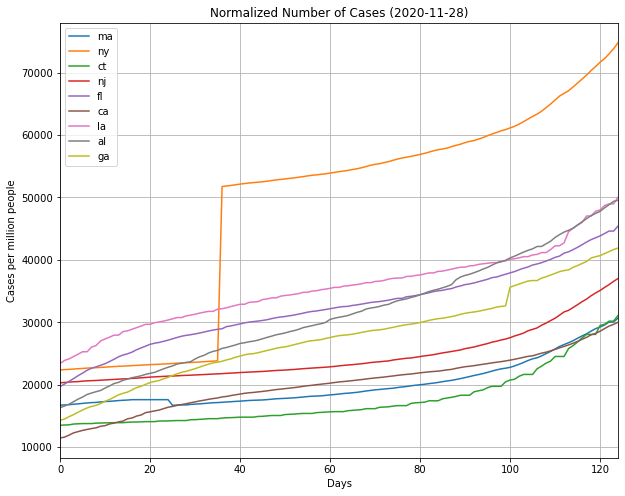

In [60]:

fig=plt.figure(figsize=[10,8])

for cname in cnames: 
    plt.plot(eval(cname + '[3]'))
plt.legend(cnames)
plt.grid()
plt.title('Normalized Number of {0} ({1})'.format(param,dfUS.columns[4]))
plt.xlabel('Days')
plt.ylabel('{0} per million people'.format(param))
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('States_normalized_{0}.png'.format(param), dpi=fig.dpi)
    

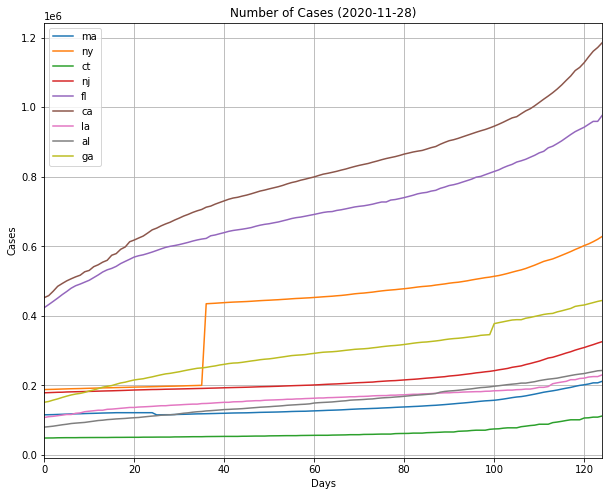

In [61]:

fig=plt.figure(figsize=[10,8])

for cname in cnames: 
    plt.plot(eval(cname + '[2]'))
plt.legend(cnames)
plt.grid()
plt.title('Number of {0} ({1})'.format(param,dfUS.columns[4]))
plt.xlabel('Days')
plt.ylabel('{0}'.format(param))
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('States_{0}.png'.format(param), dpi=fig.dpi)
    

In [62]:
ny[3]

0      22377.976562
1      22415.833984
2      22455.833984
3      22505.001953
4      22560.357422
           ...     
120    71680.953125
121    72262.023438
122    73007.859375
123    73833.218750
124    74806.554688
Name: New York normalized, Length: 125, dtype: float32